This notebook contains various examples of how to read in tabulated data in Python.

Date Created: Fall 2016
<br>
Last Modified: Feb 5 2017 
<br>
Humans Responsible: The Prickly Pythons

In [1]:
%matplotlib inline

# 1. Read data files in different formats in Python

## 1.0 Starting with ASCII files!
See links below for more information: 
<br>
https://docs.python.org/3/howto/unicode.html
<br>
https://stackoverflow.com/questions/2241348/what-is-unicode-utf-8-utf-16

In [32]:
chr(65)

'A'

In [ ]:
chr(0b01000001)

In [ ]:
chr(0x41)

In [ ]:
ord('A')

In [ ]:
aphrase = [0x4A, 0x65, 0x67, 0x20, 0x6C, \
           0xE6, 0x72, 0x65, 0x72, 0x20, \
           0x50, 0x79, 0x74, 0x68, 0x6F, \
           0x6E, 0x2E]

for i in range(len(aphrase)):
    print(chr(aphrase[i]))

In [ ]:
ord('æ')

In [ ]:
chr(230)

In [ ]:
chr(0x1F603)

## 1.1 Reading data in using numpy.loadtxt()
Docs: http://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html

In [ ]:
# In test_data/ there is a text file called spectrum.dat 
# with data that we want to load into python. 
# (spectrum.dat is a model stellar spectrum from starburst99 for 
# a group of stars with 0.7 x solar metallicity, 
# 1e4 solar masses population, Kroupa IMF and a starburst 1e6 years ago).

In [2]:
import numpy as np
spec_nparray = np.loadtxt('test_data/spectrum.dat', skiprows=6)

print(type(spec_nparray))

<class 'numpy.ndarray'>


In [5]:
# Shape of this numpy array will be determined by number of columns and rows in your data:
print(spec_nparray.shape)

(1221, 5)


In [4]:
# And if you want to extract e.g. the column containing wavelength data, 
# you need to remember its column index, in this case 1:
wavelength_A = spec_nparray[:,1]

print(wavelength_A)

[  9.10000000e+01   9.40000000e+01   9.60000000e+01 ...,   1.20000000e+06
   1.40000000e+06   1.60000000e+06]


In [6]:
# By default, numbers are loaded with float 64 bit precision: 
print(wavelength_A.dtype)

float64


## 1.2 Reading data in using numpy.genfromtxt()
Doc: http://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html

The `genfromtxt()` function from numpy is a bit more flexible.

In [7]:
spec_nparray2 = np.genfromtxt('test_data/spectrum.dat', skip_header=6, \
                              names=['t_yr','wavelength_A','L_tot','L_stellar','L_nebular'])
print(type(spec_nparray2))

<class 'numpy.ndarray'>


In [8]:
# Print the seventh value in the wavelength column.
print(spec_nparray[7,1])
print(spec_nparray2['wavelength_A'][7])

106.0
106.0


In [15]:
# Try to change one of the wavelengths into something that is not a number (like %%%) 
# and you will see that genfromtxt() can handle this if you specify the keywords:
# missing_values='%%%', filling_values=desired_value
spec_nparray2 = np.genfromtxt('test_data/spectrum_nan.dat', skip_header=6,\
                              names=['t_yr','wavelength_A','L_tot','L_stellar','L_nebular'],\
                              missing_values='%%%', filling_values=np.nan)

print(spec_nparray2['wavelength_A'][0])

nan


In [16]:
# But loadtxt() will crash:
spec_nparray = np.loadtxt('test_data/spectrum_nan.dat', skiprows=6)

ValueError: could not convert string to float: b'%%%'

## 1.3 Read data into Pandas dataframe
Typically, a smarter way (if you are essentially loading a matrix) is to load the data directly into a Pandas dataframe.
http://pandas.pydata.org/pandas-docs/stable/dsintro.html

In [20]:
import pandas as pd

names=['t_yr','wavelength_A','L_tot','L_stellar','L_nebular']
spec_dataframe = pd.read_table('test_data/spectrum.dat', \
                               names=names,              \
                               skiprows=6,               \
                               sep=r"\s*",               \
                               engine='python')    
print(type(spec_dataframe))

<class 'pandas.core.frame.DataFrame'>


In [19]:
spec_dataframe['t_yr'][1]

10010000.0

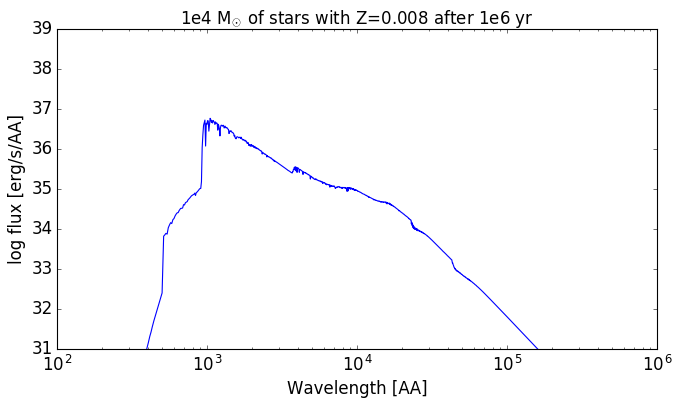

In [21]:
# Plot spectrum
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15

fig          =   plt.figure(0, figsize=(10,5))
ax1          =   fig.add_axes([0.15,0.1,0.75,0.8])
ax1.set_ylim(31,39)
ax1.set_xlim(1e2,1e6)
ax1.set_xscale('log')
ax1.set_xlabel('Wavelength [AA]', fontsize=15)
ax1.set_ylabel('log flux [erg/s/AA]', fontsize=15)
ax1.set_title('1e4 M$_{\odot}$ of stars with Z=0.008 after 1e6 yr', fontsize=15)#+str(t1)+' yr')
#ax1.plot(spec_nparray[:,1],spec_nparray[:,2],'b')
#ax1.plot(spec_nparray2['wavelength'],spec_nparray2['L_tot'],'b')
ax1.plot(spec_dataframe['wavelength_A'], spec_dataframe['L_tot'],'b')

plt.show()

In [22]:
# Using pandas to save a dataframe with pickle:
spec_dataframe.to_pickle('test_data/spec_dataframe_pickle') # no extension
load_spec_dataframe_pickle = pd.read_pickle('test_data/spec_dataframe_pickle')
load_spec_dataframe_pickle['t_yr'][0] # test

10010000.0

## 1.4 `Fits` files from astropy

In [ ]:
# In test_data/ there is a file called cloud.fits with data that we 
# want to import into python. 
# (cloud.fits is a simulated HCO+ data cube of a cloud, calculated with RT code LIME)

In [23]:
# Read fits file into list-like Python object with the fits function from the astropy module
from astropy.io import fits

fits_file = fits.open('test_data/cloud.fits')
print(type(fits_file))
fits_file.info() # get basic info, like number of header cards and dimensions of data

<class 'astropy.io.fits.hdu.hdulist.HDUList'>
Filename: test_data/cloud.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      34   (100, 100, 61)   float32   


//anaconda/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [24]:
print(fits_file[0].header) # display all header cards

SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    3 / number of data axes                            NAXIS1  =                  100 / length of data axis 1                          NAXIS2  =                  100 / length of data axis 2                          NAXIS3  =                   61 / length of data axis 3                          EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H OBJECT  = 'LIMEMDL '                                                            EPOCH   =                2000.                                                  LONPOLE =                 180.                                                  EQUINOX =                2000.          

In [25]:
# We can extract general info from the header cards like this:
imgres = fits_file[0].header['CDELT2']
print('Image resolution: ' + str(imgres) + ' degrees')
npix = fits_file[0].header['NAXIS3']
print('Number of pixels on each side: ' + str(npix))
velres = fits_file[0].header['CDELT3']
print('Velocity resolution: ' + str(velres) + 'm/s')
fits_file[0].header['CDELT2']=2.0
print('Image resolution: ' + str(imgres) + ' degrees')

Image resolution: 2.77777778110544e-05 degrees
Number of pixels on each side: 61
Velocity resolution: 500.0m/s
Image resolution: 2.77777778110544e-05 degrees


In [26]:
# And the actual data is an attribute of data[0]
HCO_flux = fits_file[0].data # [velocity channels, x axis, y axis]
print(HCO_flux[0,50,50])
mom0 = HCO_flux.sum(axis=0)*velres/1000 # moment 0 map, Jy*km/s

0.463905


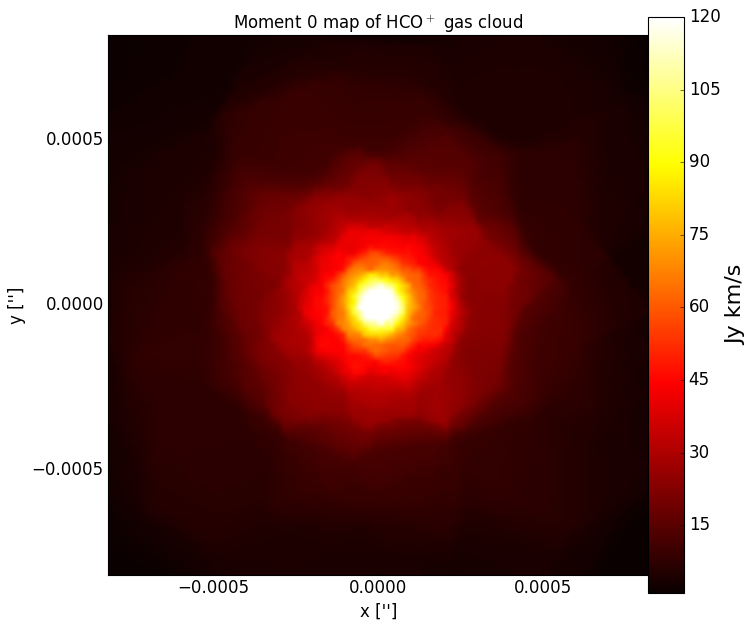

In [27]:
# Contour plot of data cube
import matplotlib.cm as cm
import matplotlib.pyplot as plt

fig         =   plt.figure(1,figsize=(9,9))
ax1         =   fig.add_axes([0.15,0.1,0.75,0.8])
ax1.set_xlabel("x ['']",fontsize=15)
ax1.set_ylabel("y ['']",fontsize=15)
ax1.set_title("Moment 0 map of HCO$^+$ gas cloud",fontsize=15)
x1 = imgres*(np.arange(npix)-npix/2) # image axis
xmax = max(x1)
im = ax1.imshow(mom0,interpolation='bilinear',origin='lower',cmap=cm.hot,extent=(-xmax,xmax,-xmax,xmax),vmax=120)
cax = fig.add_axes([0.9,0.1,0.05,0.8])
cbar = plt.colorbar(im,cax=cax)
cbar.set_label('Jy km/s',size=20)
plt.show(block=False)

# 2. Saving data for later with numpy
Docs: 
<br>
https://docs.scipy.org/doc/numpy/reference/generated/numpy.save.html
<br>
https://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html

In [28]:
# Say you have a numpy array that you want to save to a file and load later. 
# One way to do so is with numpy:
np.save('test_data/spec_nparray', spec_nparray) # will get a '.npy' extension

In [29]:
# Test - using numpy.load()
load_spec_nparray = np.load('test_data/spec_nparray.npy')
load_spec_nparray[7,1]

106.0

# 3. Pickling
Docs: 
<br>
https://docs.python.org/3/library/pickle.html
<br>
https://docs.python.org/2.3/lib/module-cPickle.html

In [ ]:
# You can also use pickle! Or cPickle, which is pickle written in C, 
# with several advantages.
import cPickle as pickle

pickle.dump(spec_nparray, open('test_data/spec_nparray_pickle','wb')) # no extension
# 'wb' is the protocol and means to write to binary format
load_spec_nparray = pickle.load(open('test_data/spec_nparray_pickle','rb'))
load_spec_nparray[7,1] # Test

In [ ]:
# But the to_pickle attribute is specific to pandas and will not work on say a numpy array:
spec_nparray.to_pickle('test_data/spec_dataframe_pickle')